# Comapring the heights of plants from cross- and self-ferilised plants

## 1. Aim

Compare the heights of fifteen pairs of plants of the species *Zea mays*.
Each plant had parents grown from the same seed, where one plant in each pair was the offspring of a cross-fertilisation, the other of a self-fertilisation.

## 2. Setup the notebook

### 2.1 Import the modules

In [1]:
from scipy.stats import t, ttest_1samp, probplot
from math import sqrt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# set the seaborn theme
sns.set_theme()

### 2.2 Load the data

In [2]:
df_plants = pd.read_csv("..\\data\\darwin.csv")

### 2.3 Calculate differences

In [3]:
diff = df_plants["Cross"] - df_plants["Self"]

## 3. Explore the data

### 3.1 Describe the data

In [4]:
diff.describe()

count    15.000000
mean     20.933333
std      37.744378
min     -67.000000
25%      11.000000
50%      24.000000
75%      45.000000
max      75.000000
dtype: float64

### 3.2 Visualise the data

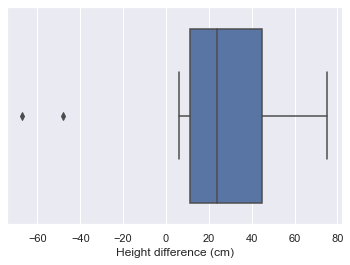

In [5]:
ax = sns.boxplot(x=diff)
ax.set(xlabel="Height difference (cm)")
plt.show()

## 4. Check assumptions

### 4.1 Check normality

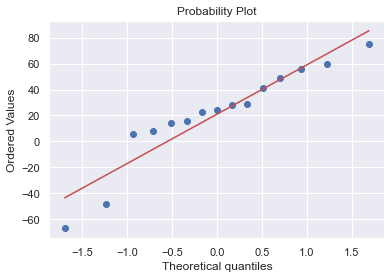

In [6]:
ax = plt.subplot()
probplot(x=diff, plot=ax)
plt.show()

## 5. Test the data

### 5.1 Get confidence interval

In [7]:
# get parameters
mean = diff.mean()
size = diff.size
ese = diff.std()/sqrt(size)

# declare t-distribution
tdist = t(
    df=size-1,
    loc=mean,
    scale=ese)

# get 95% confidence interval
tdist.interval(0.95)

(0.03119331840152384, 41.83547334826514)

### 5.2 Perform $t$-test

In [8]:
ttest_1samp(a=diff, popmean=0, alternative="greater")

Ttest_1sampResult(statistic=2.1479874613311205, pvalue=0.024851472010900447)